# **Seismic Fault Detection using Deep Learning**

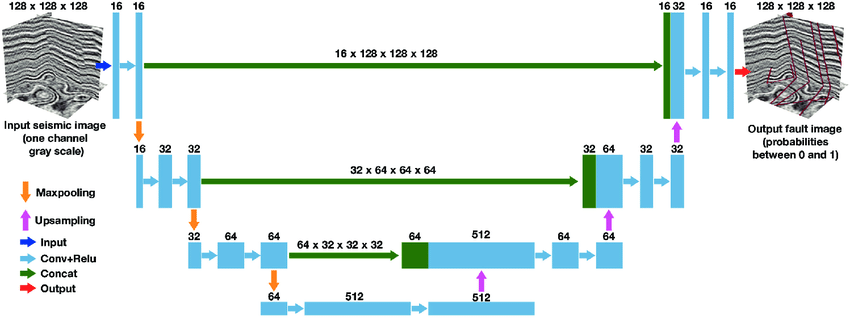

<h2>Project Team</h2>

>- Jake Joiner (1074798)
>- Ashwini Akula (2152242)
>- Nivedita (2131471)
>- Avisha singh (2088371)
>- Aditya Shah (2088748)
>- Vandan Pandya (2100996)

<h2> Introduction</h2>

> The interpretation of anomalies from seismic
data is essential for the understanding of the
subsurface primary supply and oil and gas transportation, as well as
"break zones in carbonate rock areas that
can be used for hydrocarbon gathering.

> Fault images are traditionally calculated from
seismic data, and fault detection is done using
a fault enhancement technique. Traditional
approaches rely heavily on parameters, which
means that the parameters must be tweaked
numerous times to get optimal detection. the
interpretation of conventional faults relies
heavily on interpreters knowledge.

> In order to solve the problem, we are going to utlize computer vision techniques to detect faults in seismic image.

> <B>The aim of the project is to perform comparative analysis of different segmentation techniques and leverage them to detect faults in seismic images.</B>

<h2> Business Impact</h2>

>-  From the
perspective of business value. the goal is to
make fault detection more time-efficient and
cost-effective

>- It will also expedite the process of finding oil, confirming reserves of oil for loan acquisition, and drilling planning through reservoir modeling. 

<h2>Dataset Description</h2>

> The dataset used in our project were images extracted from the “Netherlands f3 block data”. It contains different images of synthetic data generated from“Netherlands f3 block data”. It contains 200 seismic images and 200 respective masked images (labelled image), which reflects faults in it.

<h2>Flow of the Project</h2>

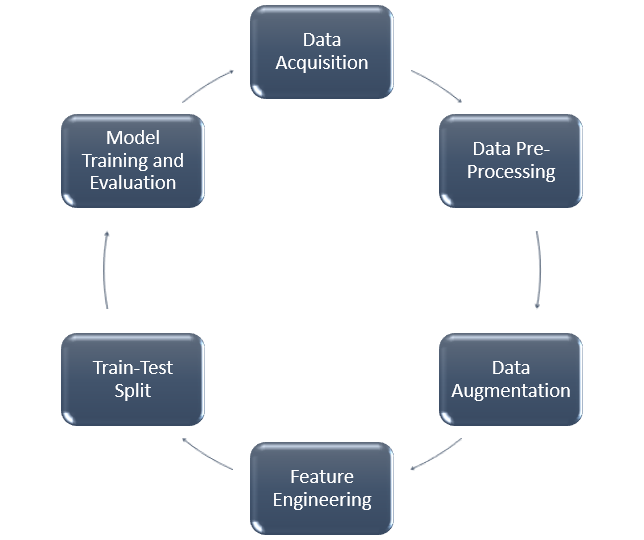

<h2>Challenges</h2>

> Limited data is one of challenges, as it can over fit the segmentation model.

> Labelling masked images.

### Install Segmentation Models and import libraries

In [ ]:
pip install -U segmentation-models

In [ ]:
#Import required libraries

#import tensorflow as tf
import segmentation_models as sm
import glob
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
import keras 
from keras.metrics import MeanIoU
from google.colab.patches import cv2_imshow
from tensorflow.keras.utils import normalize
from keras.preprocessing.image import *
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
import random

In [ ]:
# Mount google drive to get connected 

from google.colab import drive #comment out this line if you are using Colab
drive.mount("/content/gdrive/") #comment out this line if you are using Colab

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
# Set working direct to get the data

main_path = "/content/gdrive/My Drive/Big data analytics/"
os.chdir(main_path)

## ***NOTE : To run this code please upload the data set folder 'data' for fault images and masks we generated programmatically***

# **Data Acquisition and Pre-Processing**

### Import Seismic images

In [ ]:
# Set the X and Y dimension to resize the image

SIZE_X = 128 
SIZE_Y = 128

In [ ]:
# Reading seismic images and, resizing and storing it to a list 

train_images = []

for directory_path in glob.glob("/content/gdrive/My Drive/Big data analytics/data/Train Data/seis_m/"):
    for img_path in sorted( filter( os.path.isfile,glob.glob(directory_path + '*.png', recursive=True) ) ):
        img = cv2.imread(img_path, 1)       
        img = cv2.resize(img, (SIZE_Y, SIZE_X))
        train_images.append(img)

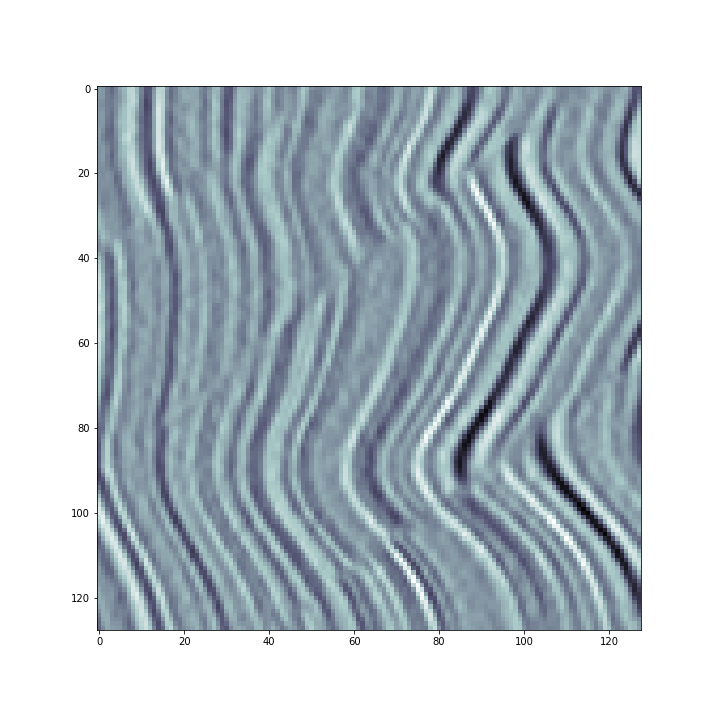

In [ ]:
# Show Seismic Image

img = cv2.imread('/content/gdrive/My Drive/Big data analytics/data/Train Data/seis_m/0.png', 1)       
cv2_imshow(img)

In [ ]:
# Shape of each image

train_images[0].shape

(128, 128, 3)

In [ ]:
#Convert list to numpy array for faster processing 

train_images = np.array(train_images)

In [ ]:
# Array shape

train_images.shape

(1000, 128, 128, 3)

### Import Seismic Fault Images (masked images)

In [ ]:
# Reading seismic fault images and, resizing and storing it to a list 
# Also performed thresholding to set pixel values to 0 and 255 and then divided it by 255 to label it as 0 and 1.

train_masks = []

for directory_path in glob.glob("/content/gdrive/My Drive/Big data analytics/data/Train Data/fault_m_1/"):  
    for img_path in sorted( filter( os.path.isfile,glob.glob(directory_path + '*.png', recursive=True) ) ):
        img = cv2.imread(img_path, 0)       
        img = cv2.resize(img, (SIZE_Y, SIZE_X))
        
        # Thresholding
        (thresh, blackAndWhiteImage) = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
        
        # Division by 255
        img = blackAndWhiteImage/255
        train_masks.append(img)

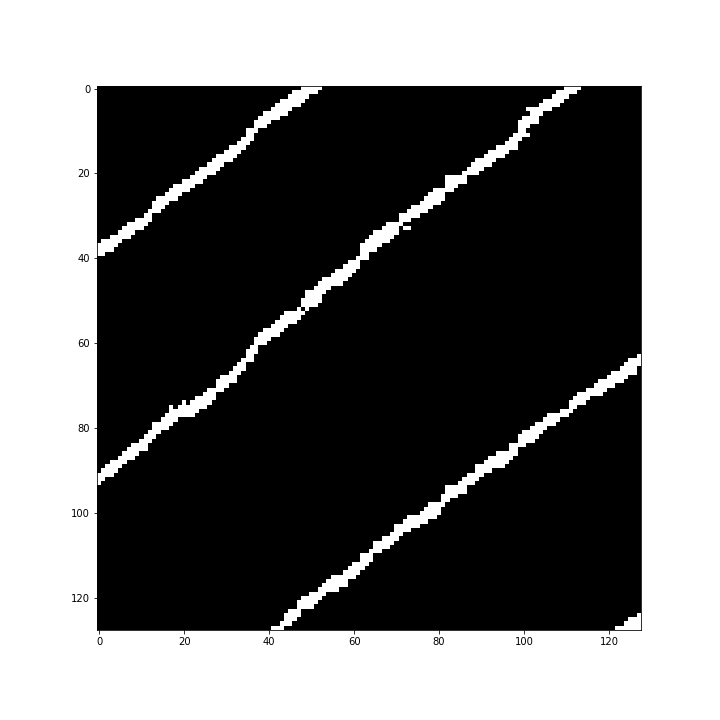

In [ ]:
# Show Seismic fault Image

img = cv2.imread('/content/gdrive/My Drive/Big data analytics/data/Train Data/fault_m_1/0.png', 0)       
cv2_imshow(img)

In [ ]:
# Shape of fault image

train_masks[0].shape

(128, 128)

In [ ]:
# Unique values of pixel in image

np.unique(train_masks[0])

array([0., 1.])

In [ ]:
# Convert list to numpy array for faster processing 

train_masks = np.array(train_masks)

In [ ]:
# Shape of train mask array

train_masks.shape

(1000, 128, 128)

# **Data Augmentation**


### Augmentation on Seismic images

In [ ]:
# Perform two augmentation techniques horizontal and vertical flip on seismic images


'''
src='/content/gdrive/My Drive/Big data analytics/data/Train Data/seis_m/'
dest ='/content/gdrive/My Drive/Big data analytics/data/Train Data/seis_m_aug/'

# lets define a ImageDataGenerator object
# change the arguments below as per the requirment
idg = ImageDataGenerator(
    
                                      horizontal_flip = True,
                                      vertical_flip = True,
                         )



for dk in range(200):
    
  # sample code to check if our agumentation is working for a single image
  # lets read our image to be processed - change the directory as needed
  image = load_img(src+str(dk)+'.png')
  print(image)
  input_arr = img_to_array(image)
  
  # print(input_arr)
  # reshaping the image to a 4D array to be used with keras flow function.
  input_arr = input_arr.reshape((1,) + input_arr.shape)

  # print(input_arr)
  i = 0

  # keras flow function usually work for batches
  # change the directory and number of iterations as required
  
  for batch in idg.flow(input_arr, batch_size=1, save_to_dir=dest, save_prefix=str(dk) + str('_') + str(i), save_format='png',seed=42):
      i += 1
      if i > 1:
          break  # need to break the loop otherwise it will run infinite times

'''

### Augmentation on Fault images

In [ ]:
# Perform two augmentation techniques horizontal and vertical flip on fault images

'''
src='/content/gdrive/My Drive/Big data analytics/data/Train Data/fault_m/'
dest ='/content/gdrive/My Drive/Big data analytics/data/Train Data/fault_m_aug/'

# lets define a ImageDataGenerator object
# change the arguments below as per the requirment
idg = ImageDataGenerator(
    
                                      horizontal_flip = True,
                                      vertical_flip = True,
                         )



for dk in range(200):
    
  # sample code to check if our agumentation is working for a single image
  # lets read our image to be processed - change the directory as needed
  image = load_img(src+str(dk)+'.png')
  print(image)
  input_arr = img_to_array(image)
  
  # print(input_arr)
  # reshaping the image to a 4D array to be used with keras flow function.
  input_arr = input_arr.reshape((1,) + input_arr.shape) 
  # print(input_arr)
  i = 0
  # keras flow function usually work for batches
  # chnage the directory and number of iterations as required
  for batch in idg.flow(input_arr, batch_size=1, save_to_dir=dest, save_prefix=str(dk) + str('_') + str(i), save_format='png',seed=42):
      i += 1
      if i > 1:
          break  # need to break the loop otherwise it will run infinite times
'''

### Renamed all images

In [ ]:

'''
i=200
for filename in os.listdir("/content/gdrive/My Drive/Big data analytics/data/Train Data/fault_m_aug/"):
  my_dest = str(i) + ".png"
  my_source ="/content/gdrive/My Drive/Big data analytics/data/Train Data/fault_m_aug/" + filename
  my_dest ="/content/gdrive/My Drive/Big data analytics/data/Train Data/fault_m_aug/" + my_dest
  # rename() function will
  # rename all the files
  os.rename(my_source, my_dest)
  i += 1
'''

# **Feature Engineering**

### Encoding

In [ ]:
# Number of classes

n_classes=2

In [ ]:
# Label Encoding

labelencoder = LabelEncoder()
n, h, w = train_masks.shape
train_masks_reshaped = train_masks.reshape(-1,1)
train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped)
train_masks_encoded_original_shape = train_masks_reshaped_encoded.reshape(n, h, w)

np.unique(train_masks_encoded_original_shape)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1])

In [ ]:
# Dataset size

train_masks_encoded_original_shape.shape

(1000, 128, 128)

### Expand Dimension

In [ ]:
train_masks_input = np.expand_dims(train_masks_encoded_original_shape, axis=3)

# **Train-Test Split**

In [ ]:
#Create a subset of data for quick testing
#Picking 15% for testing and remaining for training

from sklearn.model_selection import train_test_split
X1, X_test, y1, y_test = train_test_split(train_images, train_masks_input, test_size = 0.15, random_state = 42)


In [ ]:
print("Class values in the dataset are ... ", np.unique(y1))  # 0 is the background/few unlabeled 

Class values in the dataset are ...  [0 1]


In [ ]:
# converts to category

train_masks_cat = to_categorical(y1, num_classes=n_classes)
y_train_cat = train_masks_cat.reshape((y1.shape[0], y1.shape[1], y1.shape[2], n_classes))

In [ ]:
# converts to category

test_masks_cat = to_categorical(y_test, num_classes=n_classes)
y_test_cat = test_masks_cat.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], n_classes))

# Model Training

### Define Loss Function and parameters

In [ ]:
# Set parameters

n_classes=2
activation='softmax'
LR = 0.0001
optim = keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
# set class weights for dice_loss (car: 1.; pedestrian: 2.; background: 0.5;)
dice_loss = sm.losses.DiceLoss(class_weights=np.array([0.25, 0.25])) 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss 
metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]


In [ ]:
sm.set_framework('tf.keras')

sm.framework()

'tf.keras'

### UNET with Resnet 18

In [ ]:
###Model 1
BACKBONE1 = 'resnet18'
preprocess_input1 = sm.get_preprocessing(BACKBONE1)

# preprocess input
X_train1 = preprocess_input1(X1)
X_test1 = preprocess_input1(X_test)

# define model
model1 = sm.Unet(BACKBONE1, encoder_weights='imagenet', classes=n_classes, activation=activation)

# compile keras model with defined optimozer, loss and metrics
model1.compile(optim, total_loss, metrics=metrics)

#model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)

print(model1.summary())


history1=model1.fit(X_train1, 
          y_train_cat,
          batch_size=10, 
          epochs=50,
          verbose=1,
          validation_data=(X_test1, y_test_cat))


#model1.save('/content/gdrive/My Drive/Big data analytics/Saved Model/res34_backbone_50epochs.hdf5')

44933120/44920640 [==============================] - 1s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 bn_data (BatchNormalization)   (None, None, None,   9           ['data[0][0]']                   
                                3)                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, None, None,   0          ['bn_data[0][0]']                
 D)                        

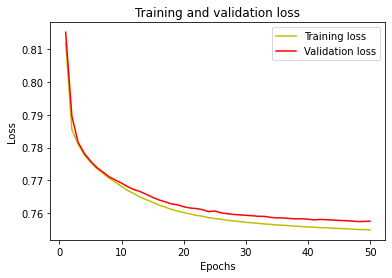

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

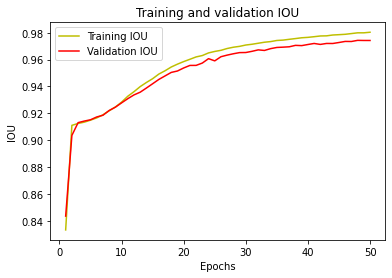

In [ ]:
acc = history1.history['iou_score']
val_acc = history1.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='Training IOU')
plt.plot(epochs, val_acc, 'r', label='Validation IOU')
plt.title('Training and validation IOU')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()
plt.show()

### UNET with Inceptionnet

In [ ]:
BACKBONE2 = 'inceptionv3'
preprocess_input2 = sm.get_preprocessing(BACKBONE2)

# preprocess input
X_train2 = preprocess_input2(X1)
X_test2 = preprocess_input2(X_test)

# define model
model2 = sm.Unet(BACKBONE2, encoder_weights='imagenet', classes=n_classes, activation=activation)


# compile keras model with defined optimozer, loss and metrics
model2.compile(optim, total_loss, metrics)
#model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)


print(model2.summary())


history2=model2.fit(X_train2, 
          y_train_cat,
          batch_size=10, 
          epochs=50,
          verbose=1,
          validation_data=(X_test2, y_test_cat))


#model2.save('/content/gdrive/My Drive/Big data analytics/model/inceptionv3_backbone_50epochs.hdf5')

87924736/87910968 [==============================] - 5s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_1 (Conv2D)              (None, None, None,   864         ['input_2[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d_1[0][0]']               
 alization)                

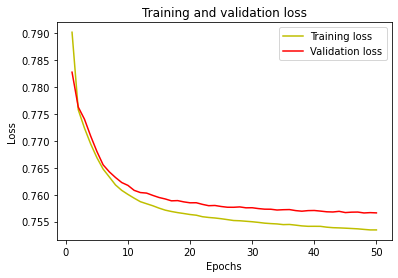

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

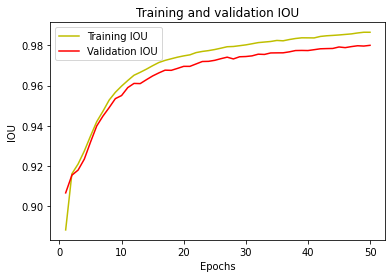

In [ ]:
acc = history2.history['iou_score']
val_acc = history2.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='Training IOU')
plt.plot(epochs, val_acc, 'r', label='Validation IOU')
plt.title('Training and validation IOU')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()
plt.show()


### UNET with VGG16

In [ ]:
###Model 3

BACKBONE3 = 'vgg16'
preprocess_input3 = sm.get_preprocessing(BACKBONE3)

# preprocess input
X_train3 = preprocess_input3(X1)
X_test3 = preprocess_input3(X_test)


# define model
model3 = sm.Unet(BACKBONE3, encoder_weights='imagenet', classes=n_classes, activation=activation)

# compile keras model with defined optimozer, loss and metrics
model3.compile(optim, total_loss, metrics)
#model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)


print(model3.summary())

history3=model3.fit(X_train3, 
          y_train_cat,
          batch_size=10, 
          epochs=50,
          verbose=1,
          validation_data=(X_test3, y_test_cat))


#model3.save('vgg19_backbone_50epochs.hdf5')

58900480/58889256 [==============================] - 2s 0us/step
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   1792        ['input_3[0][0]']                
                                64)                                                               
                                                                                                  
 block1_conv2 (Conv2D)          (None, None, None,   36928       ['block1_conv1[0][0]']           
                           

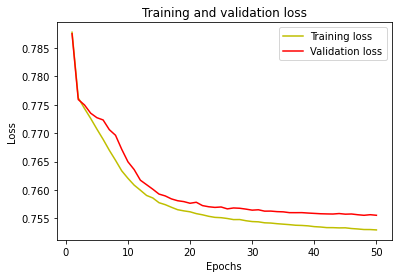

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

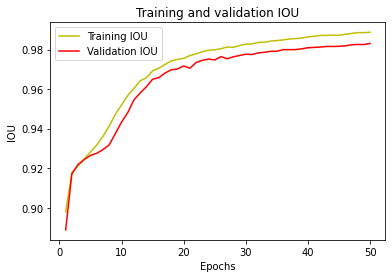

In [ ]:
acc = history3.history['iou_score']
val_acc = history3.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='Training IOU')
plt.plot(epochs, val_acc, 'r', label='Validation IOU')
plt.title('Training and validation IOU')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()
plt.show()

### FPN with Resnet 18

In [ ]:
BACKBONE1 = 'resnet18'
preprocess_input6 = sm.get_preprocessing(BACKBONE1)

# preprocess input
X_train6 = preprocess_input6(X1)
X_test6 = preprocess_input6(X_test)

# define model
model6 = sm.FPN(BACKBONE1, encoder_weights='imagenet', classes=n_classes, activation=activation)

# compile keras model with defined optimozer, loss and metrics
model6.compile(optim, total_loss, metrics)
#model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)

print(model6.summary())

history6=model6.fit(X_train6, 
          y_train_cat,
          batch_size=10, 
          epochs=50,
          verbose=1,
          validation_data=(X_test6, y_test_cat))

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 bn_data (BatchNormalization)   (None, None, None,   9           ['data[0][0]']                   
                                3)                                                                
                                                                                                  
 zero_padding2d_22 (ZeroPadding  (None, None, None,   0          ['bn_data[0][0]']                
 2D)                            3)                                                          

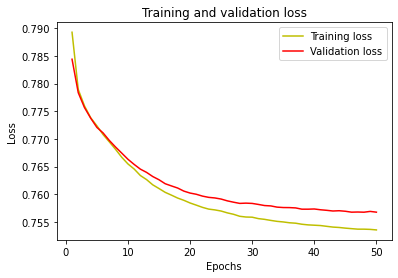

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history6.history['loss']
val_loss = history6.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

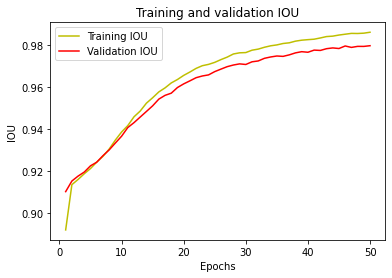

In [ ]:
acc = history6.history['iou_score']
val_acc = history6.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='Training IOU')
plt.plot(epochs, val_acc, 'r', label='Validation IOU')
plt.title('Training and validation IOU')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()
plt.show()

### FPN with Inceptionnet


In [ ]:
BACKBONE2 = 'inceptionv3'
preprocess_input7 = sm.get_preprocessing(BACKBONE2)

# preprocess input
X_train7 = preprocess_input7(X1)
X_test7 = preprocess_input7(X_test)

# define model
model7 = sm.FPN(BACKBONE2, encoder_weights='imagenet', classes=n_classes, activation=activation)

# compile keras model with defined optimozer, loss and metrics
model7.compile(optim, total_loss, metrics)
#model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)

print(model7.summary())

history7=model7.fit(X_train7, 
          y_train_cat,
          batch_size=10, 
          epochs=50,
          verbose=1,
          validation_data=(X_test7, y_test_cat))

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_95 (Conv2D)             (None, None, None,   864         ['input_6[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization_94 (BatchN  (None, None, None,   96         ['conv2d_95[0][0]']              
 ormalization)                  32)                                                         

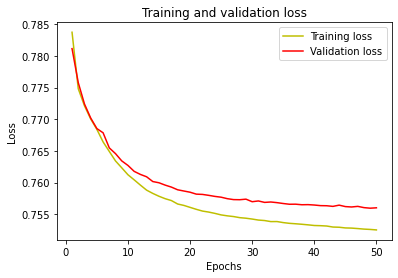

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history7.history['loss']
val_loss = history7.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

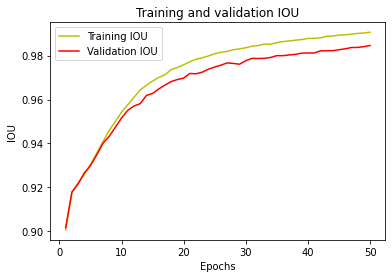

In [ ]:
acc = history7.history['iou_score']
val_acc = history7.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='Training IOU')
plt.plot(epochs, val_acc, 'r', label='Validation IOU')
plt.title('Training and validation IOU')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()
plt.show()

### FPN with VGG16

In [ ]:
BACKBONE3 = 'vgg16'
preprocess_input8 = sm.get_preprocessing(BACKBONE3)

# preprocess input
X_train8 = preprocess_input8(X1)
X_test8 = preprocess_input8(X_test)

# define model
model8 = sm.FPN(BACKBONE3, encoder_weights='imagenet', classes=n_classes, activation=activation)

# compile keras model with defined optimozer, loss and metrics
model8.compile(optim, total_loss, metrics)
#model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)

print(model8.summary())

history8=model8.fit(X_train8, 
          y_train_cat,
          batch_size=10, 
          epochs=50,
          verbose=1,
          validation_data=(X_test8, y_test_cat))

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   1792        ['input_7[0][0]']                
                                64)                                                               
                                                                                                  
 block1_conv2 (Conv2D)          (None, None, None,   36928       ['block1_conv1[0][0]']           
                                64)                                                        

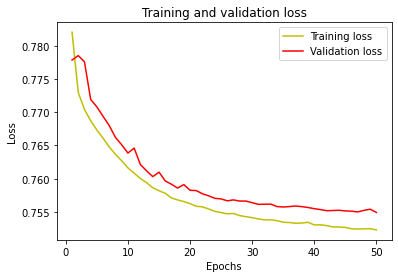

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history8.history['loss']
val_loss = history8.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

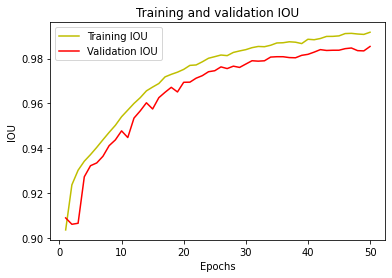

In [ ]:
acc = history8.history['iou_score']
val_acc = history8.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='Training IOU')
plt.plot(epochs, val_acc, 'r', label='Validation IOU')
plt.title('Training and validation IOU')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()
plt.show()

### Linknet with Resnet 18

In [ ]:
BACKBONE1 = 'resnet18'
preprocess_input11 = sm.get_preprocessing(BACKBONE1)

# preprocess input
X_train11 = preprocess_input11(X1)
X_test11 = preprocess_input11(X_test)

# define model
model11 = sm.Linknet(BACKBONE1, encoder_weights='imagenet', classes=n_classes, activation=activation)


# compile keras model with defined optimozer, loss and metrics
model11.compile(optim, total_loss, metrics)
#model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)


print(model11.summary())


history11=model11.fit(X_train11, 
          y_train_cat,
          batch_size=6, 
          epochs=50,
          verbose=1,
          validation_data=(X_test11, y_test_cat))

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 bn_data (BatchNormalization)   (None, None, None,   9           ['data[0][0]']                   
                                3)                                                                
                                                                                                  
 zero_padding2d_42 (ZeroPadding  (None, None, None,   0          ['bn_data[0][0]']                
 2D)                            3)                                                         

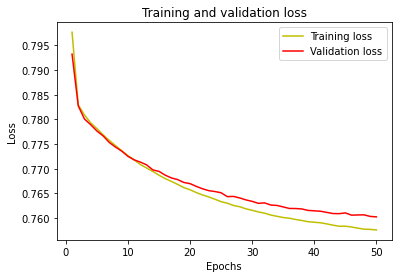

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history11.history['loss']
val_loss = history11.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

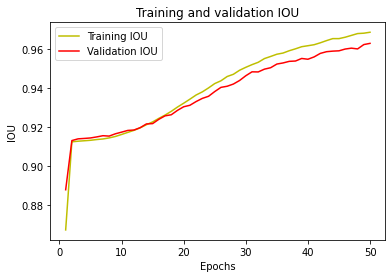

In [ ]:
acc = history11.history['iou_score']
val_acc = history11.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='Training IOU')
plt.plot(epochs, val_acc, 'r', label='Validation IOU')
plt.title('Training and validation IOU')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()
plt.show()

### Linknet with Inceptionnet

In [ ]:
BACKBONE2 = 'inceptionv3'
preprocess_input12 = sm.get_preprocessing(BACKBONE2)

# preprocess input
X_train12 = preprocess_input12(X1)
X_test12 = preprocess_input12(X_test)

# define model
model12 = sm.Linknet(BACKBONE2, encoder_weights='imagenet', classes=n_classes, activation=activation)


# compile keras model with defined optimozer, loss and metrics
model12.compile(optim, total_loss, metrics)
#model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)


print(model12.summary())


history12=model12.fit(X_train12, 
          y_train_cat,
          batch_size=10, 
          epochs=50,
          verbose=1,
          validation_data=(X_test12, y_test_cat))

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_190 (Conv2D)            (None, None, None,   864         ['input_10[0][0]']               
                                32)                                                               
                                                                                                  
 batch_normalization_188 (Batch  (None, None, None,   96         ['conv2d_190[0][0]']             
 Normalization)                 32)                                                        

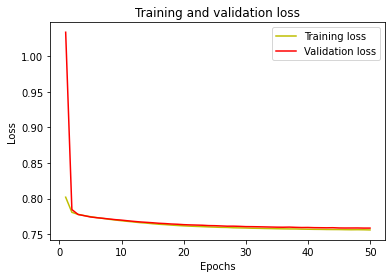

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history12.history['loss']
val_loss = history12.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

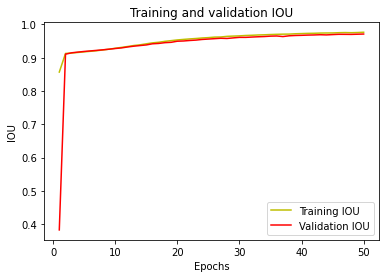

In [ ]:
acc = history12.history['iou_score']
val_acc = history12.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='Training IOU')
plt.plot(epochs, val_acc, 'r', label='Validation IOU')
plt.title('Training and validation IOU')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()
plt.show()

### Linknet with VGG16

In [ ]:
BACKBONE3 = 'vgg16'
preprocess_input13 = sm.get_preprocessing(BACKBONE3)

# preprocess input
X_train13 = preprocess_input13(X1)
X_test13 = preprocess_input13(X_test)

# define model
model13 = sm.Linknet(BACKBONE3, encoder_weights='imagenet', classes=n_classes, activation=activation)


# compile keras model with defined optimozer, loss and metrics
model13.compile(optim, total_loss, metrics)
#model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)


print(model13.summary())


history13=model13.fit(X_train13, 
          y_train_cat,
          batch_size=10, 
          epochs=50,
          verbose=1,
          validation_data=(X_test13, y_test_cat))

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   1792        ['input_11[0][0]']               
                                64)                                                               
                                                                                                  
 block1_conv2 (Conv2D)          (None, None, None,   36928       ['block1_conv1[0][0]']           
                                64)                                                        

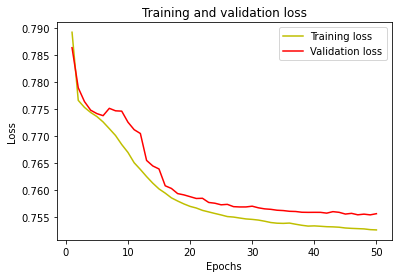

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history13.history['loss']
val_loss = history13.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

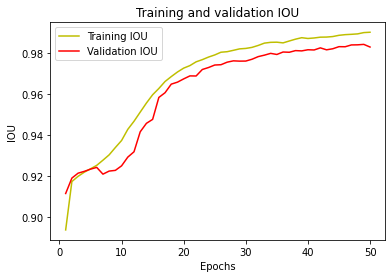

In [ ]:
acc = history13.history['iou_score']
val_acc = history13.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='Training IOU')
plt.plot(epochs, val_acc, 'r', label='Validation IOU')
plt.title('Training and validation IOU')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()
plt.show()

### **Calculate Mean IOU**

#### Train results

In [ ]:
from keras.models import load_model

y_pred1_train = model14.predict(X_train14)
y_pred1_argmax_train = np.argmax(y_pred1_train, axis=3)


#Using built in keras function
#from keras.metrics import MeanIoU
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y1[:,:,:,0], y_pred1_argmax_train)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.97320354


#### Test results

In [ ]:
from keras.models import load_model


#IOU
y_pred1=model14.predict(X_test14)
y_pred1_argmax=np.argmax(y_pred1, axis=3)


#Using built in keras function
#from keras.metrics import MeanIoU
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_test[:,:,:,0], y_pred1_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.9657402


### **Visualize segmented faults**

### Test on random image

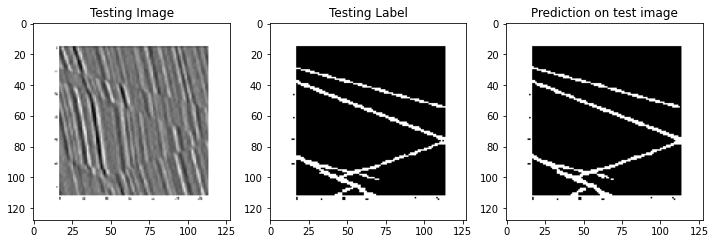

In [ ]:
# Test some random images

test_img_number = 6
test_img = X_test8[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)

#test_img_input1 = preprocess_input15(test_img_input)

test_pred1 = model8.predict(test_img_input)
test_prediction1 = np.argmax(test_pred1, axis=3)[0,:,:]

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction1, cmap='gray')
plt.show()
